### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2018
---

## Final Project Report

## Project Title: Demographics Analysis of the United States

## Student(s): Keegan Cannon

#### Date: June 15, 2018
---

#### Abstract
---

In this project, I focus on the demographics of the United States. My data sources are all Wikipedia articles that I downloaded as HTML and loaded into dataframes. The articles are the following:

Demography of the United States:
https://en.wikipedia.org/wiki/Demography_of_the_United_States
    
List of U.S. states and territories by population density:
https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population_density
    
Historical racial and ethnic demographics of the United States:
https://en.wikipedia.org/wiki/Historical_racial_and_ethnic_demographics_of_the_United_States

Immigration to the United States:
https://en.wikipedia.org/wiki/Immigration_to_the_United_States

Illegal immigration to the United States:
https://en.wikipedia.org/wiki/Illegal_immigration_to_the_United_States

I don't use all of the tables that are provided in the articles, but only a select few. I loaded many of them in as dataframes, and used them as needed when preparing charts.

My objective was to aggregate various parts of the charts that might present interesting graphs or trends in the data. All of the data provided was originally in text format, and by displaying them as graphs they become more easily understood and easily compared.

### 1. Introduction
---

I believe most of the interest here simply comes from an interest in knowing about the past, present, and future of
the country we live in.

By combining the different data sets, there is an opportunity to discover correlations between the
types of people living in an area and other things about that area. Once a correlation, if any, is found, then
we can ask "why does this correlation exist?". These sorts of questions and correlations help us learn
new things about ourselves and mankind, as well as about our individual cultures and societies.

By understanding population growth or decline and the demographics involved, we may prepare for what sorts of changes are occurring and look at what might be causing them. We can also speculate about what kinds of changes will continue to occur based on what has happened up to now.

Some questions that are looked include:
    - What countries do people mostly emigrate from? Where in the US do they mostly immigrate to?
    - At what rate are state populations changing from one ethnicity to another?
    - What are the most common religious affiliations, and how well represented are they in terms of places of worship?
    - Where do illegal immigrants emigrate from, and where do they choose to reside?
    - What are the birth and death rates of different ethnicities in the US?

### 2. Problem Definition
---

I wouldn't necessarily say that the findings address a specific problem, however they do manage to make these collections of data more easily digestible and understood by a reader. Simply reading the text on a Wikipedia article and looking at a collection of numbers doesn't convey as much to a reader as a visual representation of the data can.

As stated above in the Introduction, understanding population growth or decline and the different demographic groups involved, we as a people can analyze the changes to understand what might be causing them and where they will go in the future. It can help us know what groups are being represented and to what extent, and this sort of information can be useful in the fields of anthropology, sociology, medicine, and more. It is important for a country and its people to know who they are, and the history that makes up who they are.

### 3. Data Sources
---

The data sources are all Wikipedia articles, with the addition of one Excel spreadsheet that I did not make much use of. All of the data was collected from tables within the articles. They are parsed using the Pandas Python library with the "read_html()" function. The source of the mostly unused Excel spreadsheet is listed here as well, at the bottom.

Demography of the United States: https://en.wikipedia.org/wiki/Demography_of_the_United_States

List of U.S. states and territories by population density: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population_density

Historical racial and ethnic demographics of the United States: https://en.wikipedia.org/wiki/Historical_racial_and_ethnic_demographics_of_the_United_States

Immigration to the United States: https://en.wikipedia.org/wiki/Immigration_to_the_United_States

Illegal immigration to the United States: https://en.wikipedia.org/wiki/Illegal_immigration_to_the_United_States

Immigrant Population and Share of Total Population by State, 1990, 2000, 2010, and 2016:
Migration Policy Institute (MPI) tabulation of data from U.S. Census Bureau, 2010 and 2016 American Community Surveys (ACS), and 1990 and 2000 Decennial Census.
https://www.migrationpolicy.org/programs/data-hub/charts/immigrant-population-state-1990-present

### 4. Acquiring and Loading Data
---

In [1]:
import csv
import os
from numpy import genfromtxt
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import operator

#Create an array of the data paths
paths = ["/home/keegan/Documents/info212/final_project/demography_of_the_us.html",
         "/home/keegan/Documents/info212/final_project/historical_racial_demographics_in_the_us.html",
         "/home/keegan/Documents/info212/final_project/immigration_to_the_united_states.html",
         "/home/keegan/Documents/info212/final_project/illegal_immigration_to_the_united_states.html",
         "/home/keegan/Documents/info212/final_project/population_density_of_us_states.html"]

#This is an additional Excel file that I prepared for use, but ended up not charting
path2 = "/home/keegan/Documents/info212/final_project/immigrant_population_by_state.xlsx"

#An array to hold the individual datasets
datasets = []

#Iterates through the paths and gathers the tables from each
for path in paths:
    tables = pd.read_html(path)
    datasets.append(tables)

#Check that each dataset was loaded correctly
i = 0
for dataset in datasets:
    print "Dataset " + str(i) + " read in: " + str(len(dataset)) + " tables."
    i += 1

Dataset 0 read in: 40 tables.
Dataset 1 read in: 38 tables.
Dataset 2 read in: 23 tables.
Dataset 3 read in: 7 tables.
Dataset 4 read in: 5 tables.


### 5. Exploring and Visualizing Data
---

In [2]:
#This is a list of every dataframe I chose to use. Not everything listed here ended up being used,
#but I loaded in whatever I thought might be useful. They are grouped by article,
#and the names of the datasets explain what they contain. The heads of each set are printed
#to show that they actually contain data, although it ends up being quite messy in this form.

#Demography of the US
vital_statistics = datasets[0][2]
religious_affiliations = datasets[0][10]
racial_breakdown_by_state = datasets[0][5]
adult_religion_over_time = datasets[0][11]
median_income = datasets[0][12]
median_personal_income = datasets[0][13]
household_income = datasets[0][14]

print vital_statistics.head()
print religious_affiliations.head()
print racial_breakdown_by_state.head()
print adult_religion_over_time.head()
print median_income.head()
print median_personal_income.head()
print household_income.head()

#Historical racial demographics in the US
pop_by_age_and_race = datasets[1][7]
immigration_to_us = datasets[1][18]
immigration_top_10 = datasets[1][19]
blacks = datasets[1][27]
mexicans = datasets[1][28]
projections_2060 = datasets[1][29]
vital_statistics = datasets[1][31]
white = datasets[1][32]
black = datasets[1][34]
asian = datasets[1][35]
american_indian = datasets[1][36]
hispanic = datasets[1][37]

print pop_by_age_and_race.head()
print immigration_to_us.head()
print immigration_top_10.head()
print blacks.head()
print mexicans.head()
print projections_2060.head()
print vital_statistics.head()
print white.head()
print black.head()
print asian.head()
print american_indian.head()
print hispanic.head()

#Immigration to the US
incoming_legal_resident_avg = datasets[2][1]
incoming_resident_origin = datasets[2][7]

print incoming_legal_resident_avg.head()
print incoming_resident_origin.head()

#Illegal immigration the US
illegals_by_state = datasets[3][1]
illegals_country_of_origin = datasets[3][2]

print illegals_by_state.head()
print illegals_country_of_origin.head()

#Population density of the US
pop_density_2015 = datasets[4][0]

print pop_density_2015.head()

#Open Excel file
xlsx = pd.ExcelFile(path2)
#Get the first sheet
sheet1 = xlsx.parse(0)

print sheet1.head()

        0                                 1                2        3  \
0     NaN  Average population (x 1,000)[39]  Live births[40]   Deaths   
1  1935.0                            127362          2377000  1392752   
2  1936.0                            128181          2355000  1479228   
3  1937.0                            128961          2413000  1450427   
4  1938.0                            129969          2496000  1381391   

                4                             5  \
0  Natural change  Crude birth rate (per 1,000)   
1          984248                          18.7   
2          875772                          18.4   
3          962573                          18.7   
4         1114609                          19.2   

                                  6                           7  \
0  Crude death rate (per 1,000)[41]  Natural change (per 1,000)   
1                              10.9                         7.7   
2                              11.5                  

### 6. Wrangling and Cleansing Data
---

In [3]:
##Vital Statistics

#Setting the vital statistics columns
vital_statistics.columns = ['year', 'avg_pop', 'births', 'deaths', 'natural_change', 'birth_rate', 'death_rate', 'natural_change', 'fertility_rate']
#The first row is just the table headers and contains no data, so it gets dropped
vital_statistics.drop(vital_statistics.index[0], inplace=True)

years = vital_statistics['year']
avg_pop = vital_statistics['avg_pop']
births = vital_statistics['births']
deaths = vital_statistics['deaths']

#Set up the dataframe
vital_statistics_df = pd.DataFrame({'years': years, 'avg_pop': avg_pop, 'births': births, 'deaths':deaths})

#This particular cell had unnecessary text in it, so I just replaced it with the correct value
vital_statistics_df['births'].iloc[-1] = float(3853472)

#The numbers were originally considered strings, so I convert them to floats to be plottable
vital_statistics_df = vital_statistics_df.astype(float)

/home/keegan/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
##Religious affiliations

#Setting the religious affiliations columns
religious_affiliations.columns = ['religious_body', 'year_reported', 'places_of_worship', 'membership', 'clergy']
#The first row is just the table headers and contains no data, so it gets dropped. Last row is empty
religious_affiliations.drop(religious_affiliations.index[0], inplace=True)
religious_affiliations.drop(religious_affiliations.index[-1], inplace=True)

#Remove commas from the desired columns
religious_affiliations['places_of_worship'].replace(',', '', regex=True, inplace=True)
religious_affiliations['membership'].replace(',', '', regex=True, inplace=True)

#Remove "no data" cells and "NaN" cells
religious_affiliations['places_of_worship'].replace('no data', '0', regex=True, inplace=True)
religious_affiliations['membership'].replace('NaN', '', regex=True, inplace=True)

#Replace "NaN" cells with 0's
religious_affiliations['places_of_worship'].fillna(0, inplace=True)
religious_affiliations['membership'].fillna(0, inplace=True)

#Get lists of the desired data
religious_body = religious_affiliations['religious_body']
places_of_worship = religious_affiliations['places_of_worship']
membership = religious_affiliations['membership']

#Set up the dataframe
religious_affiliations_df = pd.DataFrame({'religious_body': religious_body, 'places_of_worship': places_of_worship, 'membership': membership})

#Replace values that were improperly formatted in the tables
religious_affiliations_df['membership'].iloc[32] = 1866
religious_affiliations_df['membership'].iloc[35] = 4050
religious_affiliations_df['membership'].iloc[73] = 55
religious_affiliations_df['membership'].iloc[77] = 15900
religious_affiliations_df['places_of_worship'].iloc[77] = 46034
religious_affiliations_df['places_of_worship'].iloc[32] = 6736
religious_affiliations_df['places_of_worship'].iloc[35] = 9638

#Convert numeric columns into int64
religious_affiliations_df[['membership','places_of_worship']] = religious_affiliations_df[['membership', 'places_of_worship']].astype('int64')

#Set index
religious_affiliations_df = religious_affiliations_df.set_index('religious_body')


In [7]:
##Various population demographics

#Some table cells had additional values like percentages within them, this function is used to remove them
def trim(x):
    if x.dtype == object:
        x = x.str.split(' ').str[0]
    return(x)

#Set up columns
white.columns = ['year', 'avg_pop', 'births', 'deaths', 'natural_change', 'birth_rate', 'death_rate', 'natural_change', 'fertility_rate']
black.columns = ['year', 'avg_pop', 'births', 'deaths', 'natural_change', 'birth_rate', 'death_rate', 'natural_change', 'fertility_rate']
asian.columns = ['year', 'avg_pop', 'births', 'deaths', 'natural_change', 'birth_rate', 'death_rate', 'natural_change', 'fertility_rate']
american_indian.columns = ['year', 'avg_pop', 'births', 'deaths', 'natural_change', 'birth_rate', 'death_rate', 'natural_change', 'fertility_rate']
hispanic.columns = ['year', 'avg_pop', 'births', 'deaths', 'natural_change', 'birth_rate', 'death_rate', 'natural_change', 'fertility_rate']

#Drop empty/useless rows
white.drop(white.index[0], inplace=True)
black.drop(black.index[0], inplace=True)
black.drop(black.index[-1], inplace=True)
asian.drop(asian.index[0], inplace=True)
asian.drop(asian.index[-1], inplace=True)
american_indian.drop(american_indian.index[0], inplace=True)
american_indian.drop(american_indian.index[-1], inplace=True)
hispanic.drop(hispanic.index[0], inplace=True)
hispanic.drop(hispanic.index[-1], inplace=True)

#Set up the birth rate dataframe
birth_rate_df = pd.DataFrame({'year': white['year'],
                   'white_births': white['births'],
                   'black_births': black['births'],
                   'asian_births': asian['births'],
                   'american_indian_births': american_indian['births'],
                   'hispanic_births': hispanic['births']})

#Use the above trim() function to clean up cells
birth_rate_df = birth_rate_df.apply(trim)

#Remove commas from numbers
birth_rate_df['white_births'].replace(',', '', regex=True, inplace=True)
birth_rate_df['black_births'].replace(',', '', regex=True, inplace=True)
birth_rate_df['asian_births'].replace(',', '', regex=True, inplace=True)
birth_rate_df['american_indian_births'].replace(',', '', regex=True, inplace=True)
birth_rate_df['hispanic_births'].replace(',', '', regex=True, inplace=True)

#Convert string numbers to floats
birth_rate_df = birth_rate_df.astype(float)

#Create additional dataframe for death rates
death_rate_df = pd.DataFrame({'year': white['year'],
                   'white_deaths': white['deaths'],
                   'black_deaths': black['deaths'],
                   'asian_deaths': asian['deaths'],
                   'american_indian_deaths': american_indian['deaths'],
                   'hispanic_deaths': hispanic['deaths']})

#Use the above trim() function to clean up cells
death_rate_df = death_rate_df.apply(trim)

#Remove commas from numbers
death_rate_df['white_deaths'].replace(',', '', regex=True, inplace=True)
death_rate_df['black_deaths'].replace(',', '', regex=True, inplace=True)
death_rate_df['asian_deaths'].replace(',', '', regex=True, inplace=True)
death_rate_df['american_indian_deaths'].replace(',', '', regex=True, inplace=True)
death_rate_df['hispanic_deaths'].replace(',', '', regex=True, inplace=True)

#Convert string numbers to floats
death_rate_df = death_rate_df.astype(float)


In [8]:
##Illegal immigrant demographics

#Set up the columns
illegals_by_state.columns = ['state', 'population', 'percent', 'percent_change', 'avg_annual_change']
illegals_country_of_origin.columns = ['country_of_origin', 'population', 'percent', 'percent_change']

#Drop empty/useless rows
illegals_by_state.drop(illegals_by_state.index[0], inplace=True)
illegals_by_state.drop(illegals_by_state.index[0], inplace=True)
illegals_country_of_origin.drop(illegals_country_of_origin.index[0], inplace=True)

#Set up the dataframe for illegal immigrants by state
illegals_by_state_df = pd.DataFrame({'state': illegals_by_state['state'],
                   'population': illegals_by_state['population']})

#Convert population numbers to int64
illegals_by_state_df[['population']] = illegals_by_state_df[['population']].astype('int64')

#Set the index as state
illegals_by_state_df = illegals_by_state_df.set_index('state')

#Set up an additional dataframe for country of origin chart
illegals_country_of_origin_df = pd.DataFrame({'country_of_origin': illegals_country_of_origin['country_of_origin'],
                   'population': illegals_country_of_origin['population']})

#Convert population numbers to int64
illegals_country_of_origin_df[['population']] = illegals_country_of_origin_df[['population']].astype('int64')

#Set the index as country of origin
illegals_country_of_origin_df = illegals_country_of_origin_df.set_index('country_of_origin')

### 7. Analyzing Data
---

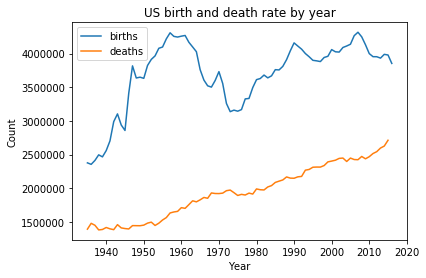

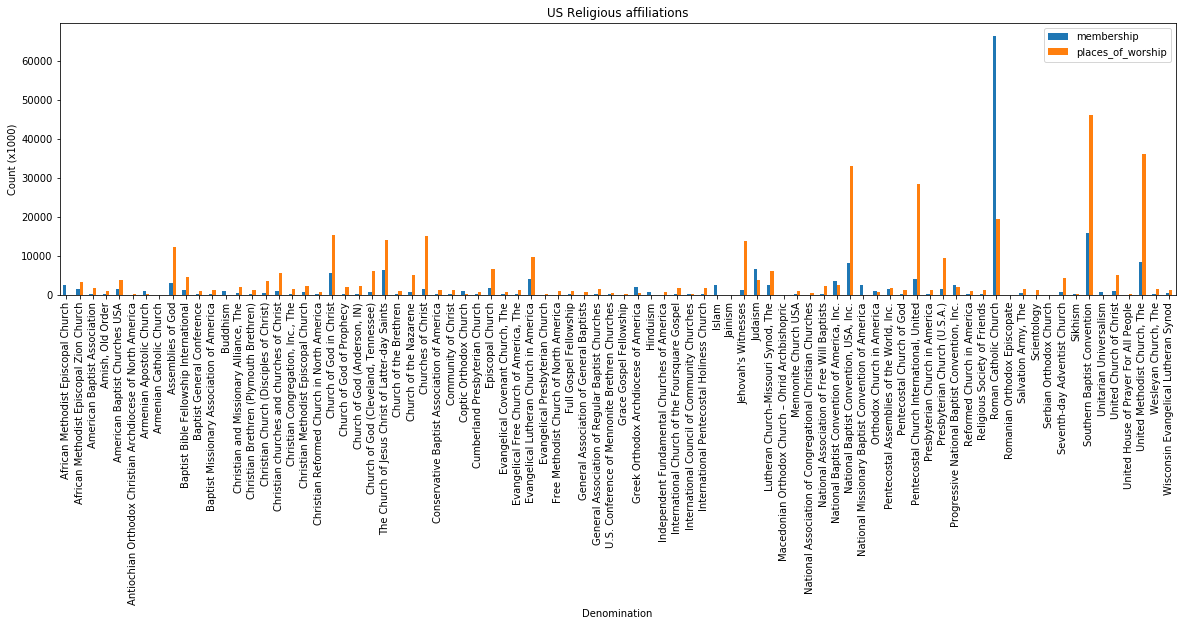

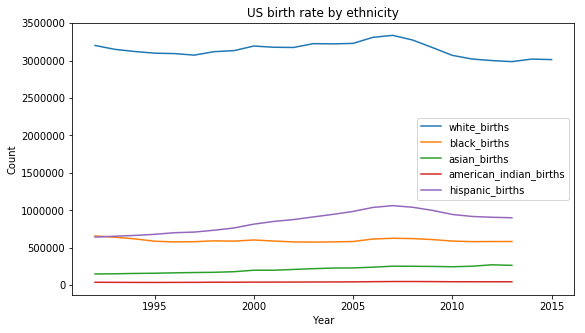

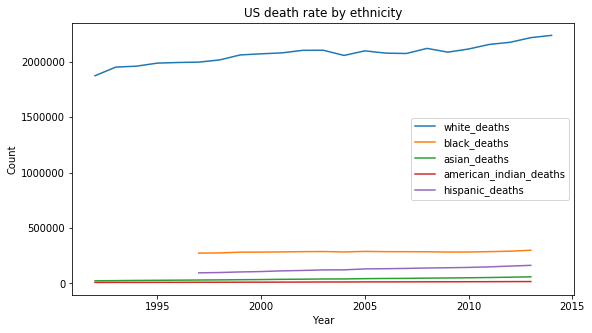

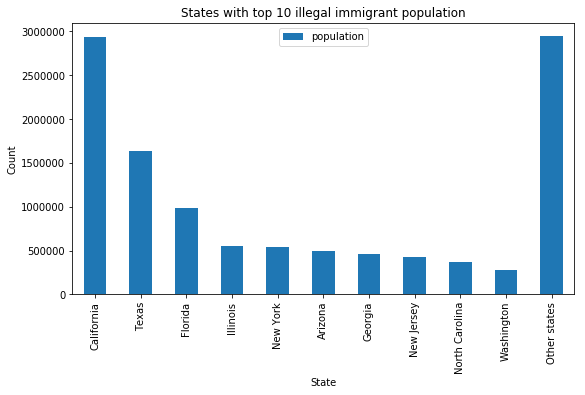

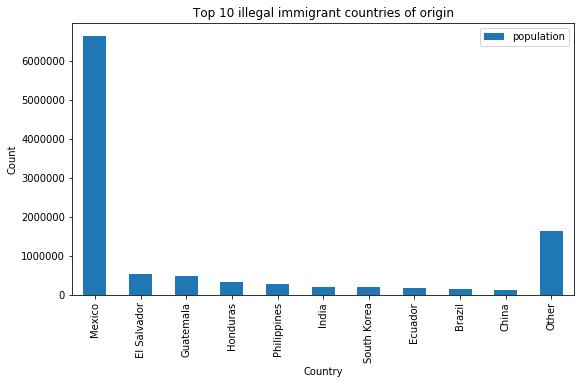

In [29]:
#All charts are generated here using the formatted dataframes above

%matplotlib inline

#US birth and death rate by year
plt.plot('years','births', data=vital_statistics_df)
plt.plot('years','deaths', data=vital_statistics_df)
plt.title('US birth and death rate by year')
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

#US Religious affiliations
plt.rcParams["figure.figsize"] = (20,5)
religious_affiliations_df.plot.bar()
plt.title('US Religious affiliations')
plt.xlabel("Denomination")
plt.ylabel("Count (x1000)")
plt.show()

#US birth rate by ethnicity
plt.rcParams["figure.figsize"] = (9,5)
plt.plot('year','white_births', data=birth_rate_df)
plt.plot('year','black_births', data=birth_rate_df)
plt.plot('year','asian_births', data=birth_rate_df)
plt.plot('year','american_indian_births', data=birth_rate_df)
plt.plot('year','hispanic_births', data=birth_rate_df)
plt.title('US birth rate by ethnicity')
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

#US death rate by ethnicity
plt.plot('year','white_deaths', data=death_rate_df)
plt.plot('year','black_deaths', data=death_rate_df)
plt.plot('year','asian_deaths', data=death_rate_df)
plt.plot('year','american_indian_deaths', data=death_rate_df)
plt.plot('year','hispanic_deaths', data=death_rate_df)
plt.title('US death rate by ethnicity')
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

#States with top 10 illegal immigrant population
illegals_by_state_df.plot.bar()
plt.title('States with top 10 illegal immigrant population')
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

#Top 10 illegal immigrant countries of origin
illegals_country_of_origin_df.plot.bar()
plt.title('Top 10 illegal immigrant countries of origin')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

### 8. Reporting Results
---

Brief analysis of above charts, in order of presentation

US birth and death rate by year:

This shows a line plot of US births and deaths placed on the same chart. There is a notable spike in birth rates from around 1950-1970, followed by a huge decline at this period. We currently appear to be on the downslope of a mildly declining birthrate. I think it's interesting that despite the rising and falling birth rates, the numbers of deaths remain fairly consistent the whole way through.

US Religious affiliations:

This one is a little hard to take in, just from the sheer number of religions that are shown on the chart. It compares the number of reported members beside the count of places of worship for those religions. Roman Catholics clearly dominate in the US, but interestingly have a relatively low number of places of worship compared to the reported number of members. In fact, it is one of the only religions where members vastly outnumber the places of worship. It's also notable that Baptists and Methodists have a significantly larger number of places of worship compared to the number of members.

US birth rate by ethnicity:

This data only covers the past couple of decades, and is somewhat consistent for each race the whole way through. There was a mild spike in white and hispanic birth rates around 2007, but both evened out afterwards.

US death rate by ethnicity:

Again, this set only covers the past couple of decades. However, there is a visible uptrend in the number of white deaths, while the other races all remain consistent, which I find interesting. Black and hispanic deaths were missing data prior to 1997 in this set, which is why they aren't plotted until then.

States with top 10 illegal immigrant population:

This one is interesting to me because the illegal immigrant population in California is equal to the entire other 40 states not shown here. California vastly outnumbers every other state, with nearly double the illegal immigrant population of the next state on the list, Texas.

Top 10 illegal immigrant countries of origin:

This shows that a huge number of illegal immigrants come from Mexico, with most of the other countries that top the list being in Central America. Mexico alone seems to account for more illegal immigrants than any other country.

### 9. Conclusion
---

By collecting the data and plotting sets alongside one another, I've made these numbers easier to understand and compare. The visuals gave me a much better understanding of the general birth and death rates over time, including the rates for specific races and ethnicities. The religious affiliations showed some interesting results by comparing the number of members to how many of their respective places of worship there are. The sources and destinations of illegal immigrants was also insightful, only because I wasn't aware of these facts beforehand. By plotting the numbers, they became much clearer to me than if I had only looked at the datasets.

I wanted to show similar statistics for legal immigrants as well, so that I could compare them to the illegal immigrant information. However, I realized too late that the data source I had chosen for this was actually the summation of all immigrants, both legal and illegal, making it unsuitable for comparison. I would also have liked to show some of this data on a plot of a US map, however I was not able to achieve this in time.

Further assessment could include heavier use of the other datasets I collected at the beginning. Several of them were unused by the end, and I think they could be very insightful if plotted alongside some of the other info.

One of the main lessons I learned here was that cleaning up the web scraped data can be extremely time consuming. I think I spent more time cleaning data than I did actually plotting it, because little pieces of unsuitable data would slip by me and break the plots. I also learned how to better combine separate sets of data that were not originally presented together, such as the birth and death rates of different races. Deciding how to best display the different types of data was also useful to think about.

### 10. References

Demography of the United States: https://en.wikipedia.org/wiki/Demography_of_the_United_States

List of U.S. states and territories by population density: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population_density

Historical racial and ethnic demographics of the United States: https://en.wikipedia.org/wiki/Historical_racial_and_ethnic_demographics_of_the_United_States

Immigration to the United States: https://en.wikipedia.org/wiki/Immigration_to_the_United_States

Illegal immigration to the United States: https://en.wikipedia.org/wiki/Illegal_immigration_to_the_United_States

Immigrant Population and Share of Total Population by State, 1990, 2000, 2010, and 2016: Migration Policy Institute (MPI) tabulation of data from U.S. Census Bureau, 2010 and 2016 American Community Surveys (ACS), and 1990 and 2000 Decennial Census. https://www.migrationpolicy.org/programs/data-hub/charts/immigrant-population-state-1990-present